# <a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science</a>
## Test <a href=http://www.ramp.studio/events/boston_housing_test>RAMP on Boston housing</a> 

<i>Balázs Kégl (LAL/CNRS)</i>

## Introduction

Boston housing is a small standard regression data set from the <a href="https://archive.ics.uci.edu/ml/datasets/Housing">UCI Machine Learning Repository</a>.

In [1]:
from __future__ import print_function

%matplotlib inline
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns; sns.set()

## Fetch the data and load it in pandas

In [2]:
local_filename = 'public_data/public_train.csv'

# Open file and print the first 3 lines
with open(local_filename) as fid:
    for line in fid.readlines()[:3]:
        print(line)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv

0.03659,25.0,4.86,0,0.426,6.302,32.2,5.4007,4,281,19.0,396.9,6.72,24.8

0.53412,20.0,3.97,0,0.647,7.52,89.4,2.1398,5,264,13.0,388.37,7.26,43.1



In [3]:
data = pd.read_csv(local_filename)

In [4]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.03659,25.0,4.86,0,0.426,6.302,32.2,5.4007,4,281,19.0,396.90,6.72,24.8
1,0.53412,20.0,3.97,0,0.647,7.520,89.4,2.1398,5,264,13.0,388.37,7.26,43.1
2,9.91655,0.0,18.10,0,0.693,5.852,77.8,1.5004,24,666,20.2,338.16,29.97,6.3
3,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
4,0.47547,0.0,9.90,0,0.544,6.113,58.8,4.0019,4,304,18.4,396.23,12.73,21.0


In [5]:
data.shape

(404, 14)

In [6]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.673026,11.018564,11.177178,0.076733,0.557466,6.273817,69.122772,3.789960,9.457921,407.965347,18.480198,356.335198,12.706559,22.390842
std,8.915392,22.957513,6.822806,0.266497,0.119247,0.717946,27.968670,2.127012,8.685615,167.558334,2.183221,91.558722,7.173002,9.239780
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082155,0.000000,5.190000,0.000000,0.453000,5.878500,45.775000,2.051000,4.000000,280.500000,17.400000,374.702500,6.915000,16.600000
50%,0.266005,0.000000,9.690000,0.000000,0.538000,6.183500,78.600000,3.239250,5.000000,332.000000,19.100000,391.600000,11.490000,20.850000
75%,3.543427,12.500000,18.100000,0.000000,0.625750,6.595750,94.150000,5.212575,24.000000,666.000000,20.200000,396.900000,17.130000,24.850000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


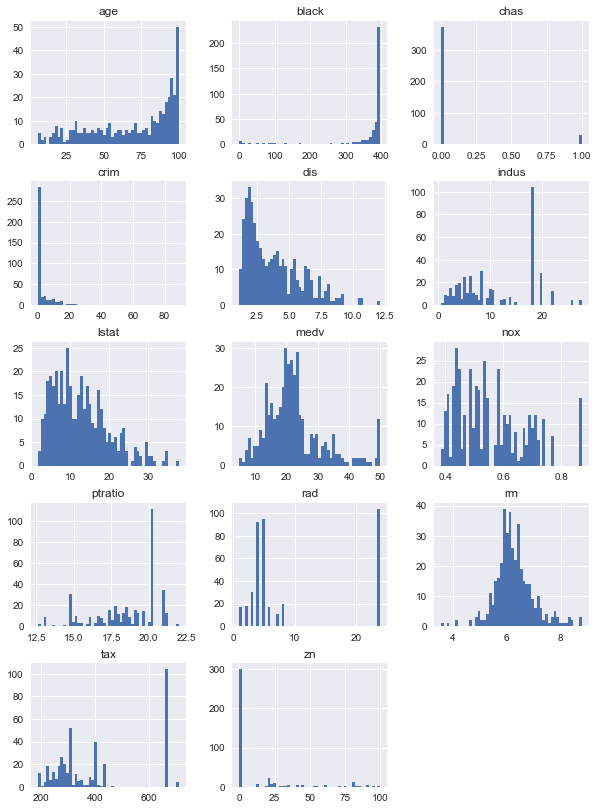

In [7]:
data.hist(figsize=(10, 20), bins=50, layout=(7, 3));

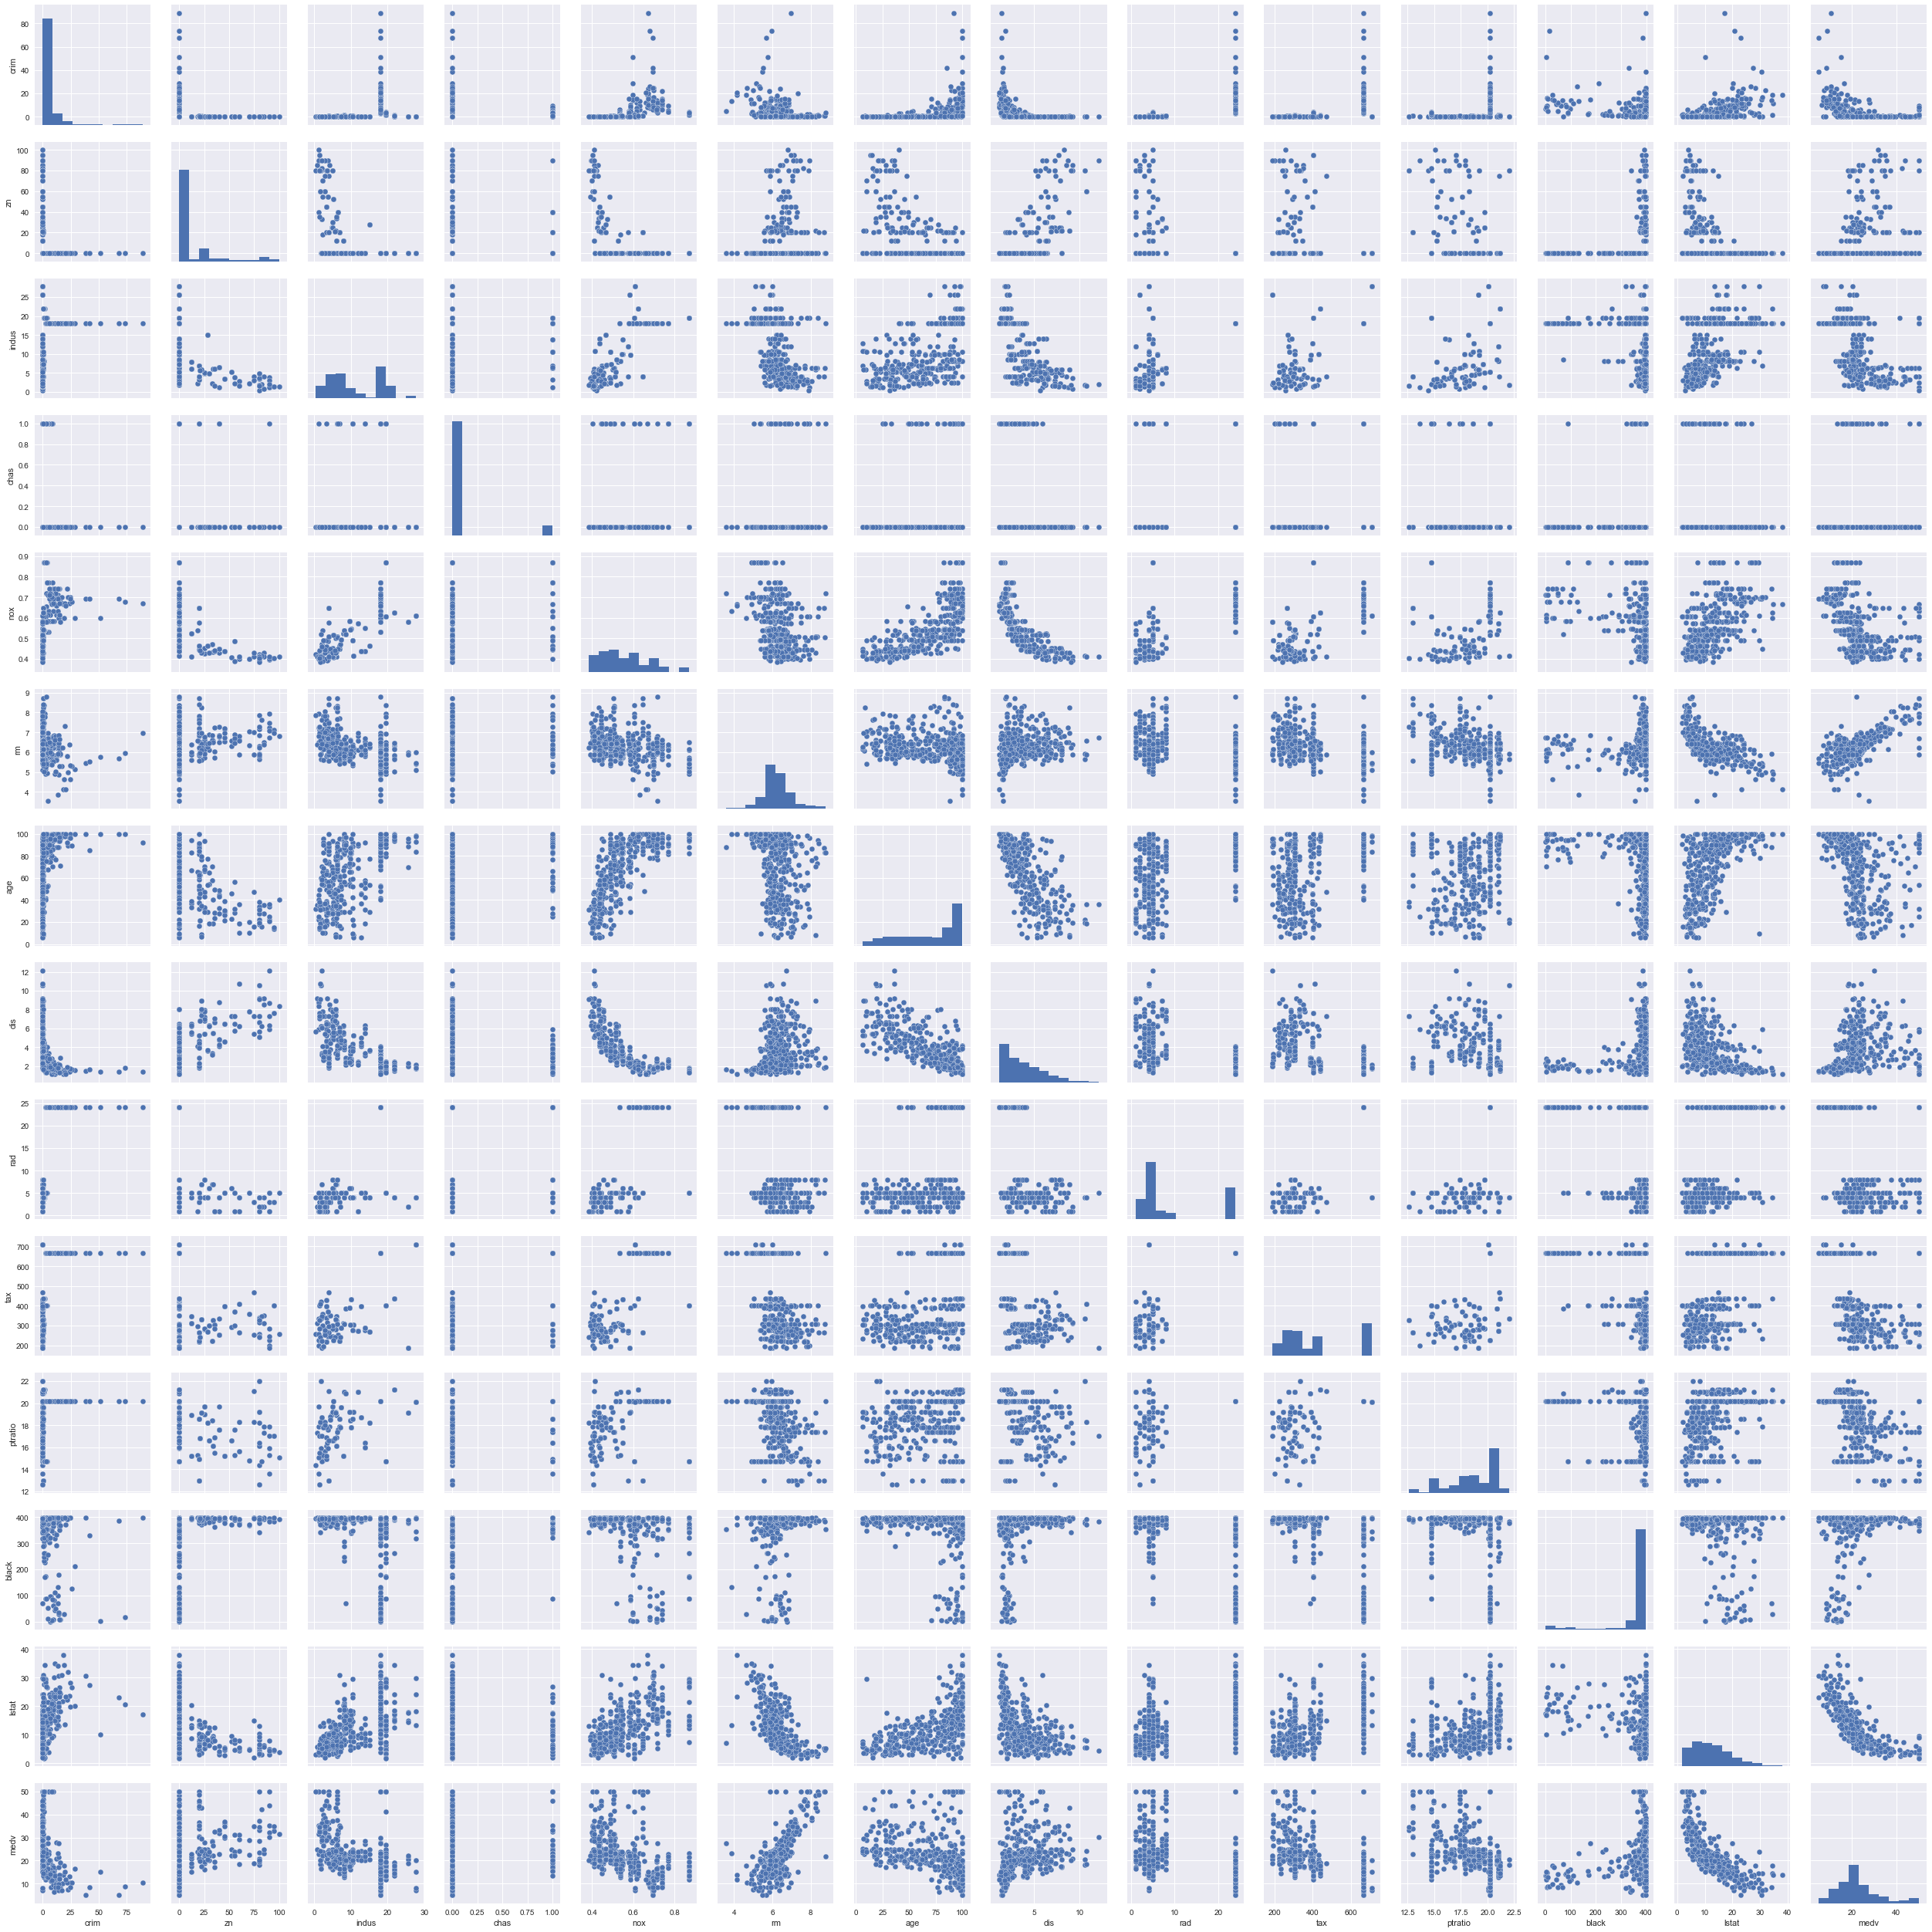

In [8]:
sns.pairplot(data);

## Building predictive models

In [9]:
features = data.drop('medv', axis=1)
X = features.values
y = data['medv'].values

The initial regressor in your sandbox.

In [10]:
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestRegressor


class Regressor(BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y):
        self.reg = RandomForestRegressor(
            n_estimators=2, max_leaf_nodes=2, random_state=61)
        self.reg.fit(X, y)

    def predict(self, X):
        return self.reg.predict(X)

The following code mimics the way your submission is tested.

In [11]:
from sklearn.model_selection import ShuffleSplit
target_column_name = 'medv'

cv = ShuffleSplit(n_splits=2, test_size=0.5, random_state=61)

for valid_train_is, valid_test_is in cv.split(X, y):
    X_valid_train = X[valid_train_is]
    y_valid_train = y[valid_train_is]
    X_valid_test = X[valid_test_is]
    y_valid_test = y[valid_test_is]
    reg = Regressor()
    reg.fit(X_valid_train, y_valid_train)
    y_valid_pred = reg.predict(X_valid_test)
    print('rmse = ',
          np.sqrt(np.mean(np.square(y_valid_test - y_valid_pred))))

rmse =  7.08132405422
rmse =  6.92412643096


## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. For this we provide a unit test. Place the python file <code>regressor.py</code>, the data <code>public_train.csv</code>, and the <code>user_test_submission.py</code></a> in a directory and run 

<code>python user_test_submission.py</code>

If it runs and prints 
<code>
rmse =  [some_number]
rmse =  [some_number]
</code>
you can submit the code.